In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tabulate

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


In [2]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  'font.size': 12,
  'grid.alpha': 0.25})

## Function declarations

### Read `ods` to `DataFrame`


In [6]:
def read_ods(filename, columns=None):
  if columns is None:
    df = pd.read_excel(filename, engine="odf", header=0)
  elif isinstance(columns, list):
    df = pd.read_excel(filename, engine="odf", header=0,
                       usecols=columns)
  else:
    key_arr = (k for k in columns.keys())
    df = pd.read_excel(filename, engine="odf", header=0,
                      usecols=key_arr)
    df = df.rename(columns=columns)
  return df

## Load the data

In [8]:
filename = "06-table-09-electronics-assemblers.ods"

df = read_ods(filename, columns=[
  "Subject", "Job Performance Rating Y",
  "Aptitude Test Score X_1", "Gender X_2"])

df.head()


,Subject,Job Performance Rating Y,Aptitude Test Score X_1,Gender X_2
0,1,5,60,0
1,2,4,55,0
2,3,3,35,0
3,4,10,96,0
4,5,2,35,0


## Plot scatter for each different gender

In [13]:
df_scatter = df.copy()

df_scatter = df.rename(columns={
  "Job Performance Rating Y": 'Y',
  "Aptitude Test Score X_1": "X_1",
  "Gender X_2": "X_2"})

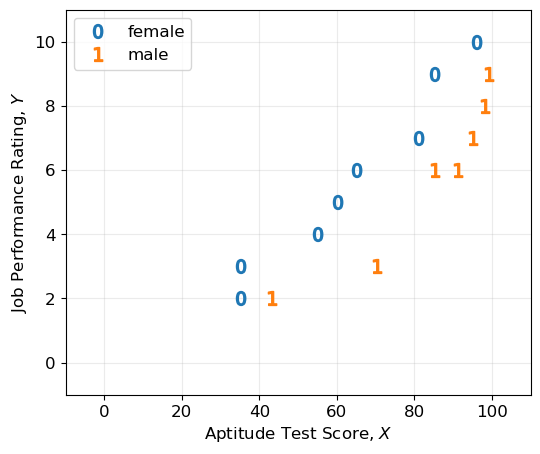

In [36]:
fig, ax = plt.subplots(figsize=(6,5))

x_female = df_scatter[df_scatter["X_2"] == 0]["X_1"].to_numpy()
y_female = df_scatter[df_scatter["X_2"] == 0]["Y"].to_numpy()

x_male = df_scatter[df_scatter["X_2"] == 1]["X_1"].to_numpy()
y_male = df_scatter[df_scatter["X_2"] == 1]["Y"].to_numpy()

ax.plot(x_female, y_female, marker=r'$0$', 
  markersize=10, linestyle="None", label="female")

ax.plot(x_male, y_male, marker=r"$1$", 
  markersize=10, linestyle="None", label="male")

ax.set_xlabel(r"Aptitude Test Score, $X$")
ax.set_ylabel(r"Job Performance Rating, $Y$")
ax.set_xlim([-10, 110])
ax.set_ylim([-1, 11])
ax.grid("on")
ax.legend(loc="best")

plt.show(fig)